In [ ]:

def define_grid_and_working_area(p1, p2, p3, p4, grid_boundaries_size):
    """
    Defines a working area and an encompassing grid based on four points.

    Args:
        p1, p2, p3, p4: Tuples representing the coordinates of the four points
                        of the working area.

    Returns:
        A tuple containing:
            - working_area_points: A list of the four input points.
            - grid_boundaries: A tuple (x_min, x_max, y_min, y_max) defining
                               the boundaries of the encompassing grid.
    """
    working_area_points = [p1, p2, p3, p4]

    # Determine grid boundaries based on the min and max coordinates of the working area points
    x_coords = [p[0] for p in working_area_points]
    y_coords = [p[1] for p in working_area_points]


    grid_boundaries = (0, grid_boundaries_size[0], 0, grid_boundaries_size[1])

    return working_area_points, grid_boundaries

p1 = (5, 1)
p2 = (13, 1)
p3 = (13, 10)
p4 = (5, 10)
grid_boundaries_size = (18, 12)

working_area, grid_boundaries = define_grid_and_working_area(p1, p2, p3, p4, grid_boundaries_size)
print("Working Area Points:", working_area)
print("Grid Boundaries (x_min, x_max, y_min, y_max):", grid_boundaries)

Working Area Points: [(5, 1), (13, 1), (13, 10), (5, 10)]
Grid Boundaries (x_min, x_max, y_min, y_max): (0, 18, 0, 12)


## Define block size

### Subtask:
Define the height and width of the block to be placed.


**Reasoning**:
Define the variables `block_height` and `block_width` as specified in the instructions.



In [ ]:
# Define the height and width of the block
block_height = 2.0
block_width = 3.0

print(f"Block Height: {block_height}")
print(f"Block Width: {block_width}")

Block Height: 2.0
Block Width: 3.0


In [ ]:
import random
import math

def rotate_point(x, y, cx, cy, theta):
    """Rotates a point (x, y) around a center (cx, cy) by an angle theta."""
    translated_x = x - cx
    translated_y = y - cy
    rotated_x = translated_x * math.cos(theta) - translated_y * math.sin(theta)
    rotated_y = translated_x * math.sin(theta) + translated_y * math.cos(theta)
    return rotated_x + cx, rotated_y + cy

def is_point_inside_polygon(point, polygon):
    """Checks if a point is inside a polygon using the ray casting algorithm."""
    x, y = point
    n = len(polygon)
    inside = False

    p1x, p1y = polygon[0]
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y

    return inside


def sample_valid_positions(working_area_points, block_width, block_height, num_samples, max_attempts=10000):
    """
    Samples valid positions (xc, yc, theta) for a block within the working area
    by sampling center points and angles independently.

    Args:
        working_area_points: A list of (x, y) tuples defining the working area.
        block_width: The width of the block.
        block_height: The height of the block.
        num_samples: The desired number of valid samples.
        max_attempts: The maximum number of sampling attempts.

    Returns:
        A list of (xc, yc, theta) tuples for valid positions, or an empty list
        if the desired number of samples could not be found within max_attempts.
    """
    valid_samples = []
    attempts = 0

    # Determine bounds for sampling center points based on working area
    x_coords = [p[0] for p in working_area_points]
    y_coords = [p[1] for p in working_area_points]
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)

    # Determine possible values for xc and yc that are multiples of 0.5 within working area bounds
    possible_xc = [i * 0.5 for i in range(int(x_min * 2), int(x_max * 2) + 1)]
    possible_yc = [i * 0.5 for i in range(int(y_min * 2), int(y_max * 2) + 1)]

    # Determine possible values for theta that are multiples of 45 degrees (pi/4 radians)
    possible_theta = [i * math.pi / 4 for i in range(8)] # 0, 45, 90, ..., 315 degrees


    while len(valid_samples) < num_samples and attempts < max_attempts:
        # Sample center point (xc, yc) from the possible values within working area bounds
        xc = random.choice(possible_xc)
        yc = random.choice(possible_yc)

        # Sample orientation (theta) from the possible values independently
        theta = random.choice(possible_theta)

        # Define block corner points relative to its center (0,0)
        half_width = block_width / 2
        half_height = block_height / 2
        block_corners_local = [
            (-half_width, -half_height),
            (half_width, -half_height),
            (half_width, half_height),
            (-half_width, half_height)
        ]

        # Rotate and translate block corner points
        block_corners_global = []
        all_corners_inside = True
        for corner_x_local, corner_y_local in block_corners_local:
            rotated_x, rotated_y = rotate_point(corner_x_local, corner_y_local, 0, 0, theta)
            translated_x, translated_y = rotated_x + xc, rotated_y + yc
            block_corners_global.append((translated_x, translated_y))

            # Check if the corner is inside the working area polygon
            if not is_point_inside_polygon((translated_x, translated_y), working_area_points):
                all_corners_inside = False
                break # No need to check other corners if one is outside

        if all_corners_inside:
            valid_samples.append((xc, yc, theta))

        attempts += 1

    return valid_samples

# Example usage (assuming working_area and block_width, block_height are already defined):
num_samples = 20
valid_positions = sample_valid_positions(working_area, block_width, block_height, num_samples)

print(f"Found {len(valid_positions)} valid positions:")
for pos in valid_positions:
    print(pos)

Found 20 valid positions:
(6.5, 5.0, 1.5707963267948966)
(8.0, 7.0, 2.356194490192345)
(10.5, 9.0, 0.0)
(11.5, 6.5, 3.141592653589793)
(10.5, 7.0, 5.497787143782138)
(9.5, 3.0, 0.0)
(7.5, 3.5, 4.71238898038469)
(11.0, 5.5, 3.141592653589793)
(11.5, 7.0, 1.5707963267948966)
(11.0, 3.5, 3.9269908169872414)
(9.0, 6.0, 5.497787143782138)
(10.0, 4.5, 2.356194490192345)
(10.0, 5.0, 3.141592653589793)
(11.0, 4.0, 4.71238898038469)
(10.0, 4.5, 1.5707963267948966)
(11.0, 6.5, 3.9269908169872414)
(10.5, 6.0, 0.7853981633974483)
(8.5, 8.5, 1.5707963267948966)
(7.0, 5.0, 0.7853981633974483)
(9.5, 7.0, 2.356194490192345)


Block corners for position (6.5, 5.0, 1.5707963267948966):
(7.5, 3.5)
(7.5, 6.5)
(5.5, 6.5)
(5.5, 3.5)


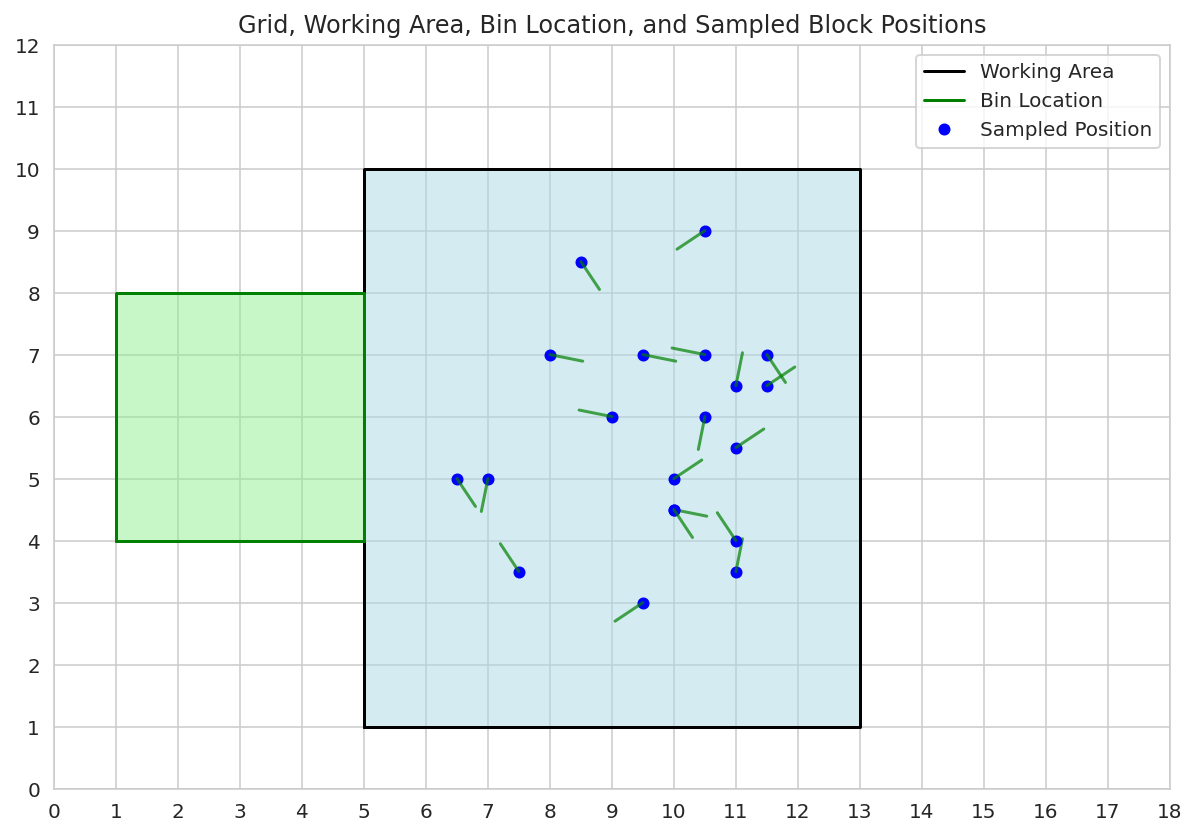

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # Import seaborn


import math

def get_block_corners(xc, yc, theta, block_width, block_height):
    """
    Calculates the global coordinates of the block corners given its center,
    orientation, width, and height.

    Args:
        xc, yc: The coordinates of the block's center.
        theta: The rotation angle in radians.
        block_width: The width of the block.
        block_height: The height of the block.

    Returns:
        A list of (x, y) tuples representing the global coordinates of the
        block's corners.
    """
    half_width = block_width / 2
    half_height = block_height / 2
    block_corners_local = [
        (-half_width, -half_height),
        (half_width, -half_height),
        (half_width, half_height),
        (-half_width, half_height)
    ]

    block_corners_global = []
    for corner_x_local, corner_y_local in block_corners_local:
        rotated_x = corner_x_local * math.cos(theta) - corner_y_local * math.sin(theta)
        rotated_y = corner_x_local * math.sin(theta) + corner_y_local * math.cos(theta)
        translated_x, translated_y = rotated_x + xc, rotated_y + yc
        block_corners_global.append((translated_x, translated_y))

    return block_corners_global

if valid_positions:
    sample_xc, sample_yc, sample_theta = valid_positions[0]
    block_corners = get_block_corners(sample_xc, sample_yc, sample_theta, block_width, block_height)
    print(f"Block corners for position ({sample_xc}, {sample_yc}, {sample_theta}):")
    for corner in block_corners:
        print(corner)
else:
    print("No valid positions were found in the previous sampling.")

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the working area
working_area_x = [p[0] for p in working_area] + [working_area[0][0]] # Close the polygon
working_area_y = [p[1] for p in working_area] + [working_area[0][1]] # Close the polygon
ax.plot(working_area_x, working_area_y, 'k-', label='Working Area')
ax.fill(working_area_x, working_area_y, 'lightblue', alpha=0.5) # Fill the working area

# Define and plot the bin location
bin_points = [(1, 4), (5, 4), (5, 8), (1, 8)]
bin_x = [p[0] for p in bin_points] + [bin_points[0][0]] # Close the polygon
bin_y = [p[1] for p in bin_points] + [bin_points[0][1]] # Close the polygon
ax.plot(bin_x, bin_y, 'g-', label='Bin Location')
ax.fill(bin_x, bin_y, 'lightgreen', alpha=0.5) # Fill the bin area


# Set axis limits based on grid boundaries
x_min, x_max, y_min, y_max = grid_boundaries
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Set axis ticks to be multiples of 1
ax.set_xticks(np.arange(x_min, x_max + 1, 1))
ax.set_yticks(np.arange(y_min, y_max + 1, 1))


# Plot sampled block positions
for i, (xc, yc, theta) in enumerate(valid_positions):
    # Define local corner points of the block
    half_width = block_width / 2
    half_height = block_height / 2
    block_corners_local = [
        (-half_width, -half_height),
        (half_width, -half_height),
        (half_width, half_height),
        (-half_width, half_height)
    ]

    # Rotate and translate block corner points to global coordinates
    block_corners_global = []
    for corner_x_local, corner_y_local in block_corners_local:
        rotated_x, rotated_y = rotate_point(corner_x_local, corner_y_local, 0, 0, theta)
        translated_x, translated_y = rotated_x + xc, rotated_y + yc
        block_corners_global.append((translated_x, translated_y))


    if i == 0:
        ax.plot(xc, yc, 'bo', markersize=5, label='Sampled Position') # Plot center with label
    else:
        ax.plot(xc, yc, 'bo', markersize=5) # Plot center without label
    line_length_multiplier = 0.3
    orientation_point_x = xc + (block_corners_global[0][0] - xc) * line_length_multiplier
    orientation_point_y = yc + (block_corners_global[0][1] - yc) * line_length_multiplier
    orientation_line_x = [xc, orientation_point_x]
    orientation_line_y = [yc, orientation_point_y]
    ax.plot(orientation_line_x, orientation_line_y, 'g-', alpha=0.7)


# Set aspect to equal
ax.set_aspect('equal', adjustable='box')

# Add labels and title
ax.set_title('Grid, Working Area, Bin Location, and Sampled Block Positions')

# Add legend (optional)
ax.legend()

# Display the plot
plt.grid(True) # Add a grid for better visualization of the area
plt.show()